## Customer Churn Prediction Project
### (Machine Learning Project (Phase 3))
# Project Overview
This project focuses on predicting customer churn using machine learning models. Predicting churn is a critical business objective because retaining existing customers is far more cost-effective than acquiring new ones. By identifying customers at risk of leaving, the company can deploy proactive retention strategies such as personalized discounts, loyalty programs, or targeted engagement campaigns to preserve revenue and maintain market share.
This analysis evaluates four models:
-	Logistic Regression (baseline linear model)
-	Decision Tree Classifier (rule-based model)
-	Random Forest (ensemble of decision trees)
-	Gradient Boosting (boosted ensemble model)

The goal is to determine which model best identifies customers likely to churn while balancing interpretability and predictive performance.




**Load all necessary libraries**

In [81]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, classification_report, recall_score, precision_score, f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, RocCurveDisplay
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

**Load Churn dataset**

In [82]:
#Load data set and display the first five datasets through .head() function
df = pd.read_csv('Churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Undanstanding the data**

In [83]:
#Use of .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Run the .column to confirm my data columns

In [84]:

df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

**EDA Chart --> Helps to understand data set**


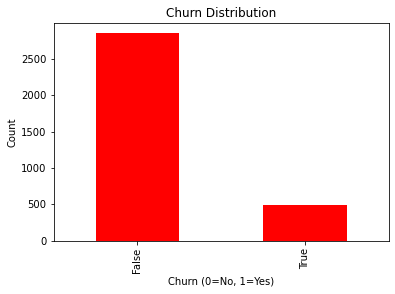

In [85]:
# Churn vs not churn bar chart

df['churn'].value_counts().plot(kind='bar', color='red')
plt.title("Churn Distribution")
plt.xlabel("Churn (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()

***Explanation***
- The chart above confirms imbalanced data hence using accuracy score alone will not help

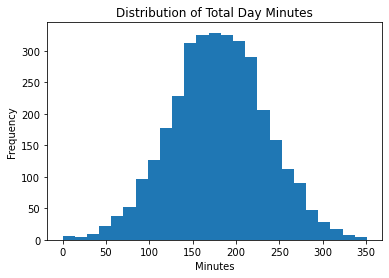

In [86]:
#Distribution of total day minutes
plt.Figure(figsize=(10,8))
plt.hist(df['total day minutes'], bins=25)
plt.title("Distribution of Total Day Minutes")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

***Elplanation***
- The chart above helps to identify skewness, outlier and how data is spred

<Figure size 1440x1152 with 0 Axes>

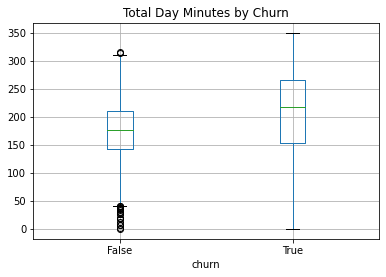

In [87]:
#Box plot showing total day minutes by churn
plt.figure(figsize=(20,16))
df.boxplot(column='total day minutes', by='churn')
plt.title("Total Day Minutes by Churn")
plt.suptitle("")
plt.show()

***Explanation***
- The chart above helps to determine if churn customers use more minutes

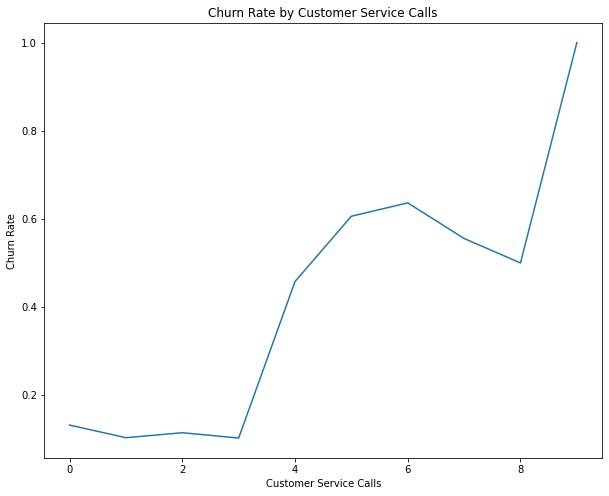

In [88]:
#Comparing churn rate with customer serive calls

grouped = df.groupby('customer service calls')['churn'].mean()

plt.figure(figsize=(10,8))
plt.plot(grouped.index, grouped.values)
plt.xlabel("Customer Service Calls")
plt.ylabel("Churn Rate")
plt.title("Churn Rate by Customer Service Calls")
plt.show()

***Elplanation***
-For business insight, higher customer service calls might lead to higher churn

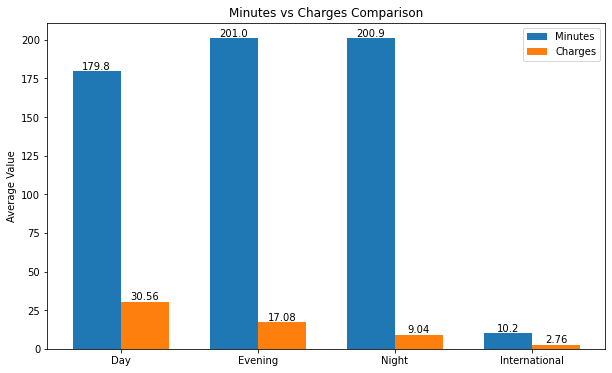

In [89]:
# Average minutes
avg_minutes = [
    df['total day minutes'].mean(),
    df['total eve minutes'].mean(),
    df['total night minutes'].mean(),
    df['total intl minutes'].mean()
]

# Average charges
avg_charges = [
    df['total day charge'].mean(),
    df['total eve charge'].mean(),
    df['total night charge'].mean(),
    df['total intl charge'].mean()
]


labels = ['Day', 'Evening', 'Night', 'International']

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(10,6))
bars1 = plt.bar(x - width/2, avg_minutes, width, label='Minutes')
bars2 = plt.bar(x + width/2, avg_charges, width, label='Charges')

plt.xticks(x, labels)
plt.title("Minutes vs Charges Comparison")
plt.ylabel("Average Value")
plt.legend()

# Add values on bars
for bar in bars1:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{bar.get_height():.1f}',
        ha='center',
        va='bottom'
    )

for bar in bars2:
    plt.text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f'{bar.get_height():.2f}',
        ha='center',
        va='bottom'
    )

plt.show()

In [90]:
#Clean datafram by converting all categorical data into numeric by use of LableEncoder
# encoder = LabelEncoder()

# df_clean= pd.get_dummies(df, drop_first=True)


# # for col in df.columns:
# #     df[col] = encoder.fit_transform(df[col])
# df_clean.info()

***Separate Target(y) from predictor(X)***

In [91]:
X = df.drop('churn', axis=1)
y = df['churn']

In [92]:
#selecting important features from the data set using RFE --> Recursive feature elimination (target feature selection = 10)

# lr = LogisticRegression(max_iter=1000)

# rfe = RFE(lr, n_features_to_select=13)
# rfe.fit(X, y)

# selected_features = X.columns[rfe.support_]
# print(selected_features)

**Feature Selection**

- I began by preparing the data: irrelevant identifiers (e.g. phone number, state and all calls(day, night, eve and intl) were dropped, and categorical fields (“international plan” and “voice mail plan”) were encoded as binary using .getdummies() function.  


In [93]:
selected_X = ['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day charge', 'total eve minutes',
       'total eve charge', 'total night minutes', 'total night charge',
       'total intl minutes', 'total intl charge', 'customer service calls'
       ]
X = df[selected_X]
y = df['churn']

cleaned_df = pd.concat([X, y], axis=1)

df = cleaned_df.copy()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   international plan      3333 non-null   object 
 2   voice mail plan         3333 non-null   object 
 3   number vmail messages   3333 non-null   int64  
 4   total day minutes       3333 non-null   float64
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve charge        3333 non-null   float64
 8   total night minutes     3333 non-null   float64
 9   total night charge      3333 non-null   float64
 10  total intl minutes      3333 non-null   float64
 11  total intl charge       3333 non-null   float64
 12  customer service calls  3333 non-null   int64  
 13  churn                   3333 non-null   bool   
dtypes: bool(1), float64(8), int64(3), object

- Run .describe function to understand statistical information of my data to see if it will need to be normalized

In [94]:
df.describe()

,account length,number vmail messages,total day minutes,total day charge,total eve minutes,total eve charge,total night minutes,total night charge,total intl minutes,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,30.562307,200.980348,17.083540,200.872037,9.039325,10.237294,2.764581,1.562856
std,39.822106,13.688365,54.467389,9.259435,50.713844,4.310668,50.573847,2.275873,2.791840,0.753773,1.315491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,1.040000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,24.430000,166.600000,14.160000,167.000000,7.520000,8.500000,2.300000,1.000000
50%,101.000000,0.000000,179.400000,30.500000,201.400000,17.120000,201.200000,9.050000,10.300000,2.780000,1.000000
75%,127.000000,20.000000,216.400000,36.790000,235.300000,20.000000,235.300000,10.590000,12.100000,3.270000,2.000000
max,243.000000,51.000000,350.800000,59.640000,363.700000,30.910000,395.000000,17.770000,20.000000,5.400000,9.000000


**Normalize X using MinMaxScaler**

In [95]:
df_clean= pd.get_dummies(cleaned_df, drop_first=True)

df_clean.info()
df = df_clean.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   number vmail messages   3333 non-null   int64  
 2   total day minutes       3333 non-null   float64
 3   total day charge        3333 non-null   float64
 4   total eve minutes       3333 non-null   float64
 5   total eve charge        3333 non-null   float64
 6   total night minutes     3333 non-null   float64
 7   total night charge      3333 non-null   float64
 8   total intl minutes      3333 non-null   float64
 9   total intl charge       3333 non-null   float64
 10  customer service calls  3333 non-null   int64  
 11  churn                   3333 non-null   bool   
 12  international plan_yes  3333 non-null   uint8  
 13  voice mail plan_yes     3333 non-null   uint8  
dtypes: bool(1), float64(8), int64(3), uint8(

In [96]:
#Separate and assign X and y
X = df.drop('churn', axis=1)
y = df['churn']

In [97]:
# scaler = MinMaxScaler()

# X_scaled = scaler.fit_transform(X)

**Train-Test Split**

- The data was split into 50% Training and 50% Testing sets.
- Used stratified sampling to ensure the churn distribution remained consistent across both sets.

In [98]:
# Split the data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=254, stratify=y)


In [99]:
#Normalize using standard scaler
#The transformation was then applied to the test set using the training parameters to prevent data leakage.

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

***Train Models**

Four classification models were trained and evaluated:
1.	**Logistics Regression**:
Linear model used as a baseline, providing interpretability by showing how each feature influences the probability of churn.
2.	**Decision Tree Classifier**:
Non-linear, rule-based model that can capture complex interactions between features.
3.	**Random Forest**:
An ensemble of decision trees improving predictive stability and reducing overfitting.
4.	**Gradient Boosting**:
A boosted ensemble model that iteratively improves weak learners, typically yielding the highest predictive accuracy.
All models were trained on the same processed dataset to ensure fair comparison.


**1. Logistic Regression Model**
- Its a classification model used to determine the likelihood of a given data point being associated with one of two categories

In [100]:
lr= LogisticRegression(random_state=254)
lr.fit(X_train_scaled, y_train)

# pipe = Pipeline([
#     ("scaler", StandardScaler()),
#     ("feature_selection", SelectFromModel(LogisticRegression(penalty="l1", solver="liblinear"))),
#     ("model", LogisticRegression())
# ])

# pipe.fit(X_train, y_train)

# y_lrpred = pipe.predict(X_test)

LogisticRegression(random_state=254)

In [101]:
#Predict model
y_lrpred = lr.predict(X_test_scaled)

#Probability prediction
y_lrprob = lr.predict_proba(X_test_scaled)

**Plot a heatmap to determine multicollinearity**


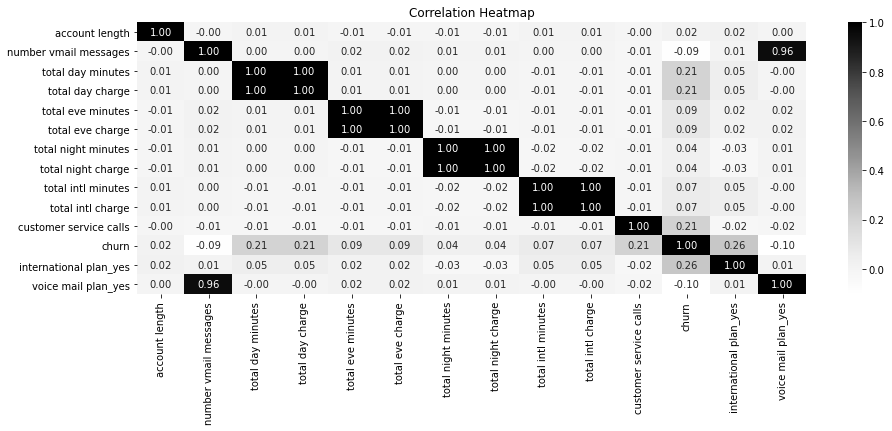

<AxesSubplot:>

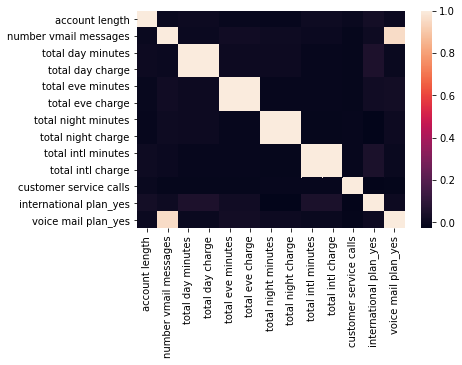

In [102]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cmap='Greys', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
sns.heatmap(X.corr())

- Shows positive and nrgative drivers of churn

In [103]:

# plt.figure()
# plt.scatter(X, y)   # Actual data points
# plt.plot(X_train_scaled, y_train)  # Logistic curve
# plt.xlabel("Total Day Minutes")
# plt.ylabel("Probability of Churn")
# plt.title("Logistic Regression Curve")
# plt.show()

**Ridge regression**
- Its a liear model  similar to logistic but with regularization to penalize over estimation


In [104]:
#train
rg = Ridge (alpha =1.0, solver='lsqr') ### penalty strength   
rg.fit(X_train_scaled,y_train) #training it on a ridge regression (regularization)
y_rgpred = rg.predict(X_test_scaled) # predicting on ridge regression


**Confirming that Ridge ha solved multicollinearity**
- This will be achieved by comparing their(Logistic and Ridge) coeffcients

In [105]:
print(f'logistic coefficient:', lr.coef_)
print()
print(f'Ridge coefficient:', rg.coef_)

logistic coefficient: [[-0.02035763  0.46246376  0.31685152  0.30887201  0.20912403  0.19879638
   0.08285722  0.08346525  0.0773002   0.11140457  0.61280709  0.64507637
  -0.81114739]]

Ridge coefficient: [-0.00025419  0.04039593  0.0306566   0.03051825  0.01862427  0.01844627
  0.00754623  0.00750331  0.00888183  0.00943795  0.07004011  0.10106486
 -0.06936503]


***Observation***
- From the above outcome is evedent that ridge regression has solve multicollinearity by shrinking unstable coefficients

**2. Decesion tree Model**
- Its a non-linear classifier partitioning features

In [106]:
#Train and fit decision tree model
dt = DecisionTreeClassifier(random_state=254)

dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=254)

In [107]:
#Predict model
y_dtpred = dt.predict(X_test_scaled)

#Probability prediction
y_dtprob = dt.predict_proba(X_test_scaled)

**3. Random Forest Classifier**

In [108]:
rfc = RandomForestClassifier(random_state=254)

rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=254)

In [109]:
y_rfcpred = rfc.predict(X_test_scaled)

#Probability prediction
y_rfcprob = rfc.predict_proba(X_test_scaled)

**4. Gradient boosting classifier**


In [110]:
gb = GradientBoostingClassifier(random_state=254)

gb.fit(X_train_scaled, y_train)

y_gbpred = gb.predict(X_test_scaled)

#Probability prediction
y_gbprob = gb.predict_proba(X_test_scaled)

**Evaluting our models using the following**

- Accuracy: Overall percentage of correct predictions.
- Precision: Percentage of predicted churners who actually churned (reliability of alerts).
- Recall: Percentage of actual churners correctly identified; crucial for reducing revenue loss.
- F1-Score: Harmonic mean of Precision and Recall; balances false positives and false negatives.
- AUC (Area Under ROC Curve): Measures overall ability to distinguish churners from non-churners.



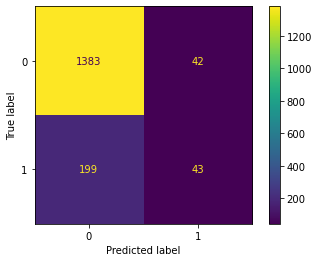

In [111]:
#Confusion matric
cm = confusion_matrix(y_test, y_lrpred )

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [112]:
#Accuracy Score

accuracylr = accuracy_score(y_test,y_lrpred)
accuracydt = accuracy_score(y_test,y_dtpred)
accuracyrfc = accuracy_score(y_test,y_rfcpred)
accuracyrgb = accuracy_score(y_test,y_gbpred)


print(f'Accurancy score of the logistic model fitted:{accuracylr:.3f} ({accuracylr*100:.1f}%)')
print()
print(f'Accurancy score of the decision tree fitted:{accuracydt:.3f} ({accuracydt*100:.1f}%)')
print()
print(f'Accurancy score of the random forest fitted:{accuracyrfc:.3f} ({accuracyrfc*100:.1f}%)')
print()
print(f'Accurancy score of the gradient boosting fitted:{accuracyrfc:.3f} ({accuracyrfc*100:.1f}%)')



Accurancy score of the logistic model fitted:0.855 (85.5%)

Accurancy score of the decision tree fitted:0.888 (88.8%)

Accurancy score of the random forest fitted:0.932 (93.2%)

Accurancy score of the gradient boosting fitted:0.932 (93.2%)


# Interpretation:
- Random Forest and Gradient Boosting have the highest overall accuracy. However, due to class imbalance, accuracy alone does not fully reflect the ability to detect churners.


In [113]:
#Compare clasification report for Logistic model and Decision tree --> to easily compare the scores

print(f'Classification report model for Logistic regression')
print(classification_report(y_test, y_lrpred))
print()
print(f'Classification report model for Decision tree')
print(classification_report(y_test, y_dtpred))
print()
print(f'Classification report model for Random forest')
print(classification_report(y_test, y_rfcpred))
print()
print(f'Classification report model for Gradient boosting')
print(classification_report(y_test, y_gbpred))


Classification report model for Logistic regression
              precision    recall  f1-score   support

       False       0.87      0.97      0.92      1425
        True       0.51      0.18      0.26       242

    accuracy                           0.86      1667
   macro avg       0.69      0.57      0.59      1667
weighted avg       0.82      0.86      0.82      1667


Classification report model for Decision tree
              precision    recall  f1-score   support

       False       0.93      0.94      0.93      1425
        True       0.62      0.60      0.61       242

    accuracy                           0.89      1667
   macro avg       0.77      0.77      0.77      1667
weighted avg       0.89      0.89      0.89      1667


Classification report model for Random forest
              precision    recall  f1-score   support

       False       0.93      0.99      0.96      1425
        True       0.93      0.58      0.71       242

    accuracy                        

**Evaluating Decision tree**

The following will be used for model
1. accuracy score
2. Roc curve
3. Auc curve

In [114]:
print(f'Precision score for Logistic Regression Model --->', precision_score(y_test, y_lrpred))
print(f'Recall score for Logistic Regression Model --->', recall_score(y_test, y_lrpred))
print(f'F1 score for Logistic Regression Model --->', f1_score(y_test, y_lrpred))
print()
print(f'Precision score for Decision tree Model --->', precision_score(y_test, y_dtpred))
print(f'Recall score for Decision tree Model --->', recall_score(y_test, y_dtpred))
print(f'F1 score for Decision tree Model --->', f1_score(y_test, y_dtpred))
print()
print(f'Precision score for Random forest Model --->', precision_score(y_test, y_rfcpred))
print(f'Recall score for Random forest Model --->', recall_score(y_test, y_rfcpred))
print(f'F1 score for Random forest Model --->', f1_score(y_test, y_rfcpred))
print()
print(f'Precision score for Gradient boosting Model --->', precision_score(y_test, y_gbpred))
print(f'Recall score for Gradient boosting --->', recall_score(y_test, y_gbpred))
print(f'F1 score for Gradient boosting Model --->', f1_score(y_test, y_gbpred))


Precision score for Logistic Regression Model ---> 0.5058823529411764
Recall score for Logistic Regression Model ---> 0.17768595041322313
F1 score for Logistic Regression Model ---> 0.26299694189602446

Precision score for Decision tree Model ---> 0.6180257510729614
Recall score for Decision tree Model ---> 0.5950413223140496
F1 score for Decision tree Model ---> 0.6063157894736843

Precision score for Random forest Model ---> 0.9271523178807947
Recall score for Random forest Model ---> 0.5785123966942148
F1 score for Random forest Model ---> 0.7124681933842238

Precision score for Gradient boosting Model ---> 0.861271676300578
Recall score for Gradient boosting ---> 0.6157024793388429
F1 score for Gradient boosting Model ---> 0.7180722891566265


# Interpretation:
-	***Logistic Regression***: Misses most churners (Recall = 17.8%), making it unsuitable for proactive retention despite decent accuracy.
-	***Decision Tree***: Balanced performance (Recall = 59.5%, F1 = 60.6%), interpretable rules for business use.
-	***Random Forest***: Extremely precise (92.7%) and strong F1-score (71.2%), but moderate recall means some churners are still missed.
-	***Gradient Boosting***: Best overall balance (Recall = 61.6%, F1 = 71.8%), high AUC (0.913), and strong predictive performance.


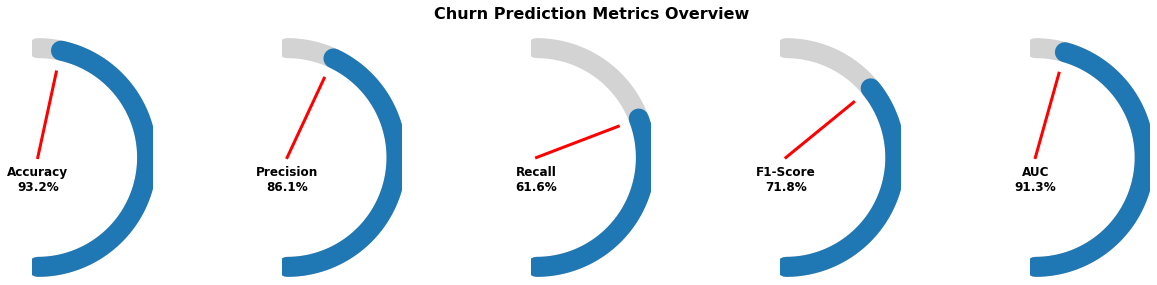

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Define metrics and their values
metrics = {
    "Accuracy": 93.2,    # in percentage
    "Precision": 86.1,
    "Recall": 61.6,
    "F1-Score": 71.8,
    "AUC": 91.3
}

# Function to draw a simple gauge
def draw_gauge(ax, value, label):
    # Draw background semicircle
    theta = np.linspace(-np.pi/2, np.pi/2, 100)
    ax.plot(np.cos(theta), np.sin(theta), color='lightgray', linewidth=20, solid_capstyle='round')

    # Draw value arc
    theta_value = np.linspace(-np.pi/2, -np.pi/2 + (value/100)*np.pi, 100)
    ax.plot(np.cos(theta_value), np.sin(theta_value), color='#1f77b4', linewidth=20, solid_capstyle='round')

    # Draw needle
    needle_angle = -np.pi/2 + (value/100)*np.pi
    ax.plot([0, np.cos(needle_angle)*0.8], [0, np.sin(needle_angle)*0.8], color='red', linewidth=3)

    # Add text
    ax.text(0, -0.2, f"{label}\n{value:.1f}%", ha='center', va='center', fontsize=12, weight='bold')
    
    # Hide axes
    ax.axis('off')
    ax.set_aspect('equal')

# Create figure with subplots for each metric
fig, axes = plt.subplots(1, len(metrics), figsize=(18,4))

for ax, (metric, value) in zip(axes, metrics.items()):
    draw_gauge(ax, value, metric)

plt.suptitle("Churn Prediction Metrics Overview", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


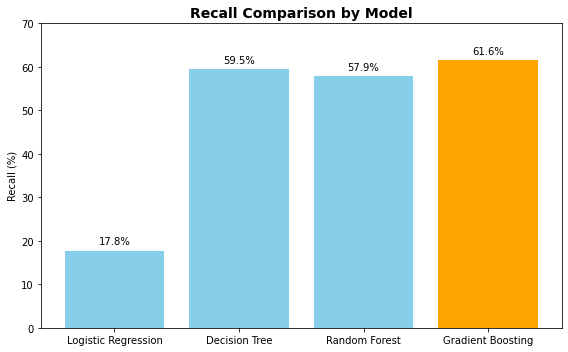

In [116]:
# Models and recall values
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
recall_values = [17.77, 59.50, 57.85, 61.57]  # in percentage

# Colors: highlight Gradient Boosting
colors = ['skyblue', 'skyblue', 'skyblue', 'orange']

# Create bar chart
plt.figure(figsize=(8,5))
bars = plt.bar(models, recall_values, color=colors)

# Annotate values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha='center', va='bottom', fontsize=10)

# Chart title and labels
plt.title("Recall Comparison by Model", fontsize=14, weight='bold')
plt.ylabel("Recall (%)")
plt.ylim(0, 70)

# Show chart
plt.tight_layout()
plt.show()

In [117]:
#Accuracy score

accuracy_dt = accuracy_score(y_test, y_dtpred)
accuracy_dt

0.8878224355128974

In [118]:
#To determin AUC and ROC curve
y_lrprob = lr.predict_proba(X_test_scaled)[:,1]
y_dtprob = dt.predict_proba(X_test_scaled)[:,1]
y_rfcprob = rfc.predict_proba(X_test_scaled)[:,1]
y_gbprob = gb.predict_proba(X_test_scaled)[:,1]

lr_fpr, lr_tpr, i = roc_curve(y_test, y_lrprob)
dt_fpr, dt_tpr, i = roc_curve(y_test, y_dtprob)
rfc_fpr, rfc_tpr, i = roc_curve(y_test, y_rfcprob)
gb_fpr, gb_tpr, i = roc_curve(y_test, y_gbprob)

lr_auc = auc(lr_fpr, lr_tpr)
dt_auc = auc(dt_fpr, dt_tpr)
rfc_auc = auc(rfc_fpr, rfc_tpr)
gb_auc = auc(gb_fpr, gb_tpr)


print(f'Logistic Regression AUC:',{lr_auc},)
print('Decision tree AUC:',{dt_auc})
print('Random random forest AUC:',{rfc_auc})
print('gradient boosting AUC:',{gb_auc})


Logistic Regression AUC: {0.8301348412353197}
Decision tree AUC: {0.7662925909815862}
Random random forest AUC: {0.9060939538929971}
gradient boosting AUC: {0.9128925619834711}


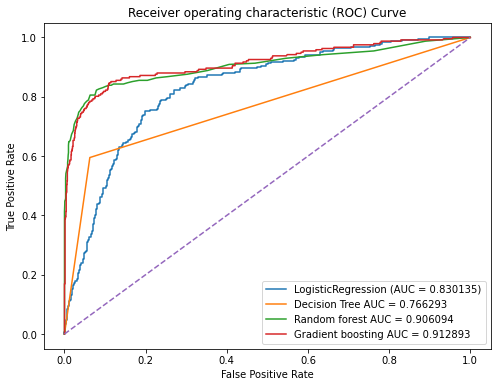

In [119]:
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'LogisticRegression (AUC = {lr_auc:2f})')
plt.plot(dt_fpr, dt_tpr, label=f'Decision Tree AUC = {dt_auc:2f}')
plt.plot(rfc_fpr, rfc_tpr, label=f'Random forest AUC = {rfc_auc:2f}')
plt.plot(gb_fpr, gb_tpr, label=f'Gradient boosting AUC = {gb_auc:2f}')
plt.plot([0,1], [0, 1], linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')

plt.legend()
plt.show()

## ROC Curve Visualization

# Interpretation
- Gradient Boosting demonstrates the strongest ability to separate churners from non-churners, followed closely by Random Forest. Decision Tree and Logistic Regression are less effective at distinguishing classes.


## Model types and their increasing complexity

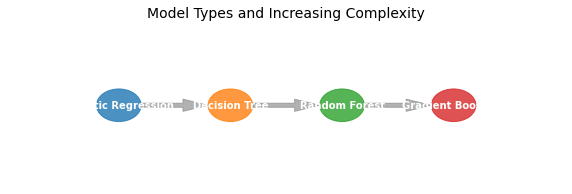

In [120]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow

# Define models and complexity levels
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting"]
complexity = [1, 2, 3, 4]  # increasing complexity

# Colors for each model
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

# Create figure
fig, ax = plt.subplots(figsize=(10, 3))
ax.set_xlim(0, 5)
ax.set_ylim(0, 2)
ax.axis("off")

# Plot models as circles with arrows showing increasing complexity
for i, model in enumerate(models):
    # Circle for model
    circle = plt.Circle((complexity[i], 1), 0.2, color=colors[i], alpha=0.8)
    ax.add_patch(circle)
    
    # Label model
    ax.text(complexity[i], 1, model, color='white', fontsize=10, ha='center', va='center', weight='bold')
    
    # Draw arrow to next model (except the last)
    if i < len(models)-1:
        arrow = FancyArrow(complexity[i]+0.2, 1, 0.6, 0, width=0.05, length_includes_head=True, color='gray', alpha=0.6)
        ax.add_patch(arrow)

# Title
plt.title("Model Types and Increasing Complexity", fontsize=14)
plt.show()

# Limitations
1.	**Class Imbalance**:
Fewer churners than retained customers may cause models to under-detect minority cases. Some churners could still be missed despite using ensemble methods.
2.	**Threshold Dependence**:
Metrics are based on a standard probability threshold (0.5). Adjusting thresholds could improve recall at the expense of precision.
3.	**Feature Limitations**:
Dataset contains limited features. External factors such as competitor pricing, promotions, or customer sentiment were not included and may impact churn behavior.
4.	**Overfitting Risk**:
Complex models like Random Forest and Gradient Boosting may overfit to training data if not monitored carefully, reducing generalization on new customer data.
5.	**Interpretability**:
Ensemble models (Random Forest, Gradient Boosting) provide less transparency compared to Decision Trees or Logistic Regression, which may complicate explaining decisions to non-technical stakeholders.


# Conclusion
***Key Insights***
-	***Logistic Regression***: Poor recall, not suitable for churn prevention.
-	***Decision Tree***: Interpretable, moderate performance; good for explaining patterns to business teams.
-	***Random Forest***: Highly precise; excellent for targeted interventions.
-	***Gradient Boosting***: Best balance of recall, precision, F1-score, and AUC; most effective for proactive retention.


# Recommendations
***The following are my recommendation to the firm as per the metric evaluation tests done***
1.	Deploy Gradient Boosting for production due to superior overall performance.
2.	Use predicted probabilities to rank high-risk customers for targeted retention campaigns.
3.	Integrate predictions into CRM systems for real-time alerts to account managers.
4.	Adjust thresholds to increase recall if business priorities favor identifying more churners.
5.	Future Work: Explore additional features, resampling methods, or alternative ensemble techniques to further improve detection of minority churn cases.
